In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1 - EDA (Keşifsel Veri Analizi)
Veri setimizi incelemeye başlayalım. Bu bölümde veri setimizin özelliklerini tanıyıp analizler gerçekleştireceğiz. Veri setimizin değişkenleri neler, bu değişkenlerin veri türleri neler, eksik verilerimiz var mı ? aykırı değerler var mı ? Bu gibi sorulara yanıt bulmak için gerekli işlemleri ve görselleştirmeleri yaparak anlamaya çalışacağız.

In [2]:
# İlk adım olarak veri setimizi yükledik ve ilk 5 gözlemi inceledik burada cinsiyet, uyruk yaş gibi gözlemlerin bir sürü verisi olduğunu görüyoruz.
df = pd.read_excel("side_effect_data 1.xlsx")
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [7]:
# Veri setimiz 2357 gözlem ve 19 farklı özellikten(kullanıcı_id, cinsiyet vb.) oluşuyor.
df.shape

(2357, 19)

In [8]:
# Veri setimizin bilgilerine baktığımızda her özelliğin 2357 non-null gözleme sahip olmadığını görüyorum.
# Yani bazı özelliklerde eksik değerlerimiz var. 
# 4 tane datetime, 3 tane sayısal özelliğimiz var geri kalanı object tipinde. Bu veri tipi bilgileri de bizim için çok önemli
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

## Nicel Verilerimizi İnceleyelim <br>
### **Kullanıcı_id**

In [16]:
# Veri setimizde kullanıcı_id, kilo ve boy değişkenlerimiz nicel değişkenler yani sayısal değişkenlerimiz.
# İlk olarak kullanıcı_id'yi inceleyelim
# Her kullanıcıya ait bir ID olması, kullanıcıların takip edilmesini ve farklı analizlerde kullanılmasını sağlar.
#  Farklı veri kaynaklarından gelen verileri kullanıcı ID'si üzerinden birleştirebiliriz.
# Kullanıcı ID'si sayesinde, tek bir kullanıcının zaman içindeki davranışlarını takip edebiliriz.
# kullanıcı_id gözlemlerin toplandığı kullanıcıyı gösteriyor. Bir kişinin birden fazla gözlemi olabilir.
# Kaç katılımcı olduğunu görmek için kaç tane unique kullanıcı_id değerimiz olduğuna bakalım

df["Kullanici_id"].nunique()

196

In [17]:
# 196 farklı katılımcıdan toplanan 2357 gözlemimiz var. Bunu göz önünde bulundurmayı unutmayalım.
# Bu bilgiden ileride kuracağımız tahminleme modeli için hipotezler üretebiliriz.

In [27]:
# Kullanici_id column'unda na değerimiz, eksik gözlemimiz bulunmamakta.Her gözlemin kim tarafından yapıldığı belirli
df["Kullanici_id"].isna().sum()

0

## Kullanici_id Özelliklerimiz her bir katılımcının Kimlik Numarası gibi olduğundan bunlarla tanımlayıcı istatistiklere bakmamız veya grafik yorumlamamız anlamsız olacaktır. Çünkü bunlar sayısal bir değer vermez, katılımcının kim olduğunu görmemize yarayan bir etiket gibi düşünebiliriz. <br>
### **Şimdi boy değişkenimizi inceleyelim**

**Boy değişkeni**: Bu değişkenimizi incelerken sayısal değerlere şu şekilde bakmalıyız. Bizim 2357 gözlemimiz 196 katılımcıdan gelmekte, yani 2357 gözlemde aynı boy verileri oldukça fazla olacaktır. Bizim her katılımcınn boyunu bir kere sayısal analize katmamız lazım. Bu durum bir katılımcının farklı zamanlarda ölçüm yaptırdığı için kaynaklanıyor olabilir ayrıca kayıp değerlerimiz de olabilir. İlk olarak kayıp değerlerimizi inceleyip ondan sonra istatistikleri inceleyelim

In [28]:
# Boy sütunundaki kayıp değerlerin sayısını bulma
missing_values_count = df['Boy'].isnull().sum()
print("Boy sütununda", missing_values_count, "tane kayıp değer var.")

# Kayıp değerlerin yüzdesini hesaplama
total_rows = len(df)
missing_percentage = (missing_values_count / total_rows) * 100
print("Kayıp değerlerin yüzdesi:", missing_percentage, "%")

Boy sütununda 114 tane kayıp değer var.
Kayıp değerlerin yüzdesi: 4.836656767076793 %


**2357 gözlemde 114 kayıp boy değerimiz var. Bu %4'lük kayıp çok büyük bir oranda değil. Ayrıca 196 farklı katılımcının kaç tanesinden bu 114 değerinin geldiği de önemli. Belki 3,4 kişi gibi oldukça az bir kişiden geliyor olabilir. Bu durumda anakütlemizi etkilemeyecek kadar az bir katılımcı sayısı olduğu için bunları veri setinden boy verisini analiz ederken çıkarabiliriz. Bu 114 kayıp değerin hangi kullanici_id'lerden geldiğine bakıp tekrar yorum yapalım.**

In [38]:
# Boy sütununda kayıp değeri olan satırları filtreleme
missing_boy_data = df[df['Boy'].isnull()]

# Kullanıcı ID'lerine göre gruplama ve kayıp değer sayısını hesaplama
missing_values_by_user = missing_boy_data.groupby('Kullanici_id')['Boy'].nunique()
missing_values_by_user


Kullanici_id
3      0
11     0
37     0
45     0
80     0
112    0
137    0
148    0
152    0
157    0
Name: Boy, dtype: int64

**Görüldüğü üzere 10 adet farklı katılımcının boy değerleri eksikmiş. Göz ile bile sayabildiğimiz çok ufak bir miktar.Bu eksik değerleri analizimizi etkilememesi için boy değelerini incelerken çıkarabiliriz. Ya da ortalama, medyan gibi istatistiksel değerler ile doldurup minimum hata ile yolumuza devam edebiliriz. Buna karar vermemiz gerekli. Ama bence elimizdeki kategorik değişkenlerden "Cinsiyet" değişkenine bakarak kadın ve erkekler için ortalama ve ya medyan değerlerini o gruplara göre alırsak daha isabetli bir tahmin yapmış oluruz.Modelleme için Bu kısmı Veri Ön İşleme kısmında karar verip gerçekleştireceğiz, şu an sadece inceleyerek öğreniyoruz. 2 Seçeneğimiz var ya analize bu eksik değerleri sokmamak ya da cinsiyetlerine göre ortalama ya da medyan değerleri ile doldurarak analiz etmek. Şimdiki görselleştirmelerde ve analizlerde ben çıkaracağım**

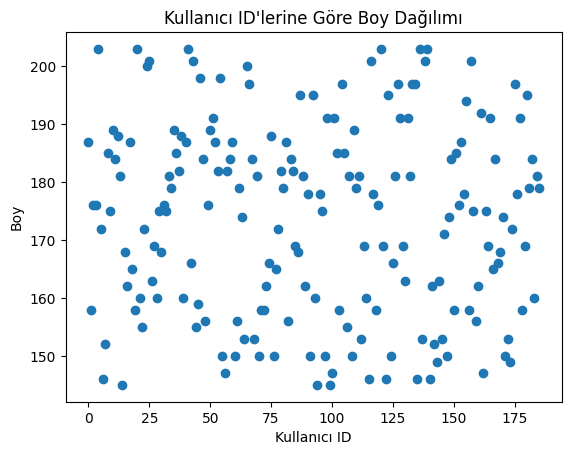

Text(0.5, 1.0, "Kullanıcı ID'lerine Göre Boy Değişimi")

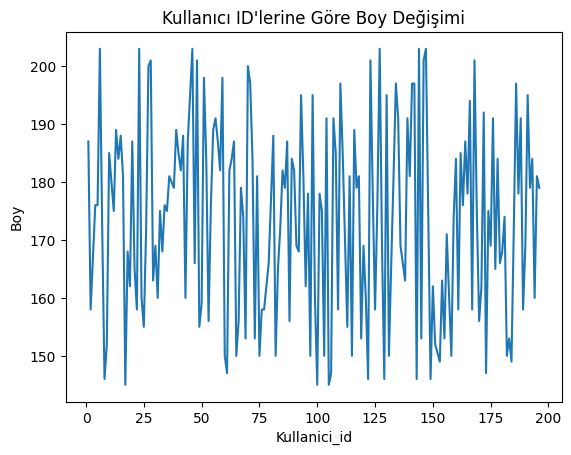

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini okuma, Kullanıcı ID'sini index olarak ayarlama
df =  pd.read_excel("side_effect_data 1.xlsx", index_col='Kullanici_id')

# Boy sütunundaki eksik değerlere sahip satırları çıkarma
df_clean = df.dropna(subset=['Boy'])

# Her bir kullanıcı için ilk boy değerini alarak yeni bir DataFrame oluşturma
df_unique_users = df_clean['Boy'].groupby(df_clean.index).first().reset_index()

# Scatter plot çizme
plt.scatter(df_unique_users.index, df_unique_users['Boy'])
plt.xlabel('Kullanıcı ID')
plt.ylabel('Boy')
plt.title('Kullanıcı ID\'lerine Göre Boy Dağılımı')
plt.show()

# Seaborn kullanarak çizgi grafiği çizme
sns.lineplot(x='Kullanici_id', y='Boy', data=df_unique_users)
plt.title('Kullanıcı ID\'lerine Göre Boy Değişimi')

**Tablolara baktığımızda 196 katılımcı - 10 eksik değeri olan katılımcı hariç yani 186 kişinin verisini görselleştirdik. Boy aralığı 140 ile 200 cm arasında değişmekte gibi gözüküyor ve boylar rastgele dağılmış gibi.Herhangi bir çarpıklık basıklık bir alana yığılma gibi bir durum söz konusu değil gibi.**

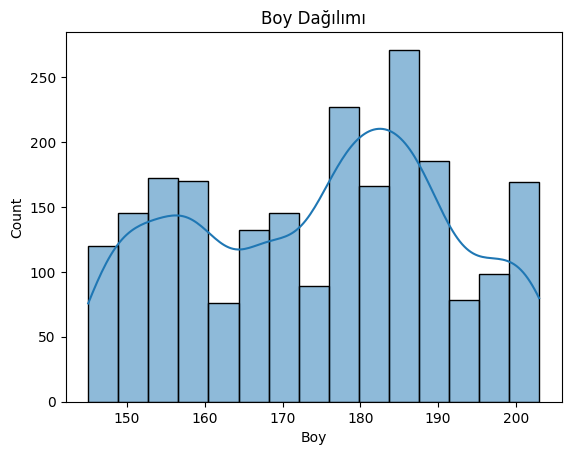

Çarpıklık: -0.11530606987957517
Basıklık: -1.0704381746576581
Shapiro-Wilk Testi:
Statistics=0.959, p=0.000


In [52]:
import scipy.stats as stats

# Histogram çizdirme
sns.histplot(df_clean['Boy'], kde=True)
plt.title("Boy Dağılımı")
plt.show()

# Çarpıklık ve basıklık değerlerini hesaplama
skew = df_clean['Boy'].skew()
kurtosis = df_clean['Boy'].kurtosis()
print("Çarpıklık:", skew)
print("Basıklık:", kurtosis)

# Normallik testi (Shapiro-Wilk testi)
stat, p = stats.shapiro(df_clean['Boy'])
print('Shapiro-Wilk Testi:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# p-value < 0.05 ise normal dağılım hipotezi reddedilir.

In [53]:
df_clean["Boy"].describe()

count    2243.000000
mean      174.638431
std        16.516552
min       145.000000
25%       160.000000
50%       176.000000
75%       187.000000
max       203.000000
Name: Boy, dtype: float64

Eksik değerlerden arındırılmış Boy değişkenimiz için tanımlayıcı istatistiklerimiz yukarıdaki gibidir. 174 cm ortalama katılımcı boyu ve standart sapması 16 dır.,

Verilerimiz yaklaşık olarak simetrik bir dağılıma sahip olsa da (çarpıklık değeri 0'a yakın), normal dağılım göstermemektedir (Shapiro-Wilk testi). Basıklık değeri de normal dağılımdan farklı olduğunu göstermektedir. Bu durum, istatistiksel analizlerde bazı zorluklar yaratabilir. Normal dağılım varsayımını gerektiren testler kullanılamayabilir veya veriler dönüştürülerek normal dağılıma yaklaştırılmaya çalışılabilir. Bu durum kadın erkek sayısının birbirine yakın olmamasından veyahut farklı bir kategorik değişkenin etkisi sebebi ile gerçekleşiyor olabilir, boy değişkenimizin normal dağılmadığını aklımızda tutarak devam edelim.

### Kilo Değişkeni
**Kilo değişkeni de tıpkı boy değişkeni gibi 196 farklı katılımcının 2357 gözleminden oluşmakta yani bir katılımcının birden fazla kez kilosu dahil olmuş durumda. Aynı boy değişkeninde yaptığımız gibi öncelikle eksik değerlerini inceleyip üzerinde gerekli işlemleri yapalım.**

In [54]:
# Kilo sütunundaki kayıp değerlerin sayısını bulma
missing_values_count = df['Kilo'].isnull().sum()
print("Kilo sütununda", missing_values_count, "tane kayıp değer var.")

# Kayıp değerlerin yüzdesini hesaplama
total_rows = len(df)
missing_percentage = (missing_values_count / total_rows) * 100
print("Kayıp değerlerin yüzdesi:", missing_percentage, "%")

Kilo sütununda 293 tane kayıp değer var.
Kayıp değerlerin yüzdesi: 12.431056427662282 %


In [56]:
# Kilo sütununda kayıp değeri olan satırları filtreleme
missing_kilo_data = df[df['Kilo'].isnull()]

# Kullanıcı ID'lerine göre gruplama ve kayıp değer sayısını hesaplama
missing_values_by_user_kilo = missing_kilo_data.groupby('Kullanici_id')['Kilo'].nunique()
missing_values_by_user_kilo.count()


26

In [57]:
# Boy sütununa göre kiloda daha fazla kayıp değerimiz var 196 katılımcının 26'sının kilo değerleri eksik
# %12 gibi bir eksikliğimiz mevcut aynı boyda dediğimiz gibi bu eksik verileri çıkarabilir, ortalama ya da
# medyan gibi bir istatistikle doldurabilir, ya da bir tahminleme algoritması ile doldurabiliriz.
# Her bir cinsiyetin kendi ortalaması ile doldurulması bana en mantıklı gelen seçenek. Bu eksik değerleri
# Veri ön işleme alanında boy sütunundan daha fazla bir kayıp olduğu için çıkarmak yerine doldurma taraftarıyım.

## Kategorik Değişkenler
**Veri setimizde görüldüğü üzere en fazla olan değişkenler kategorik değişkenlerdir. Bunlara bir göz atalım**

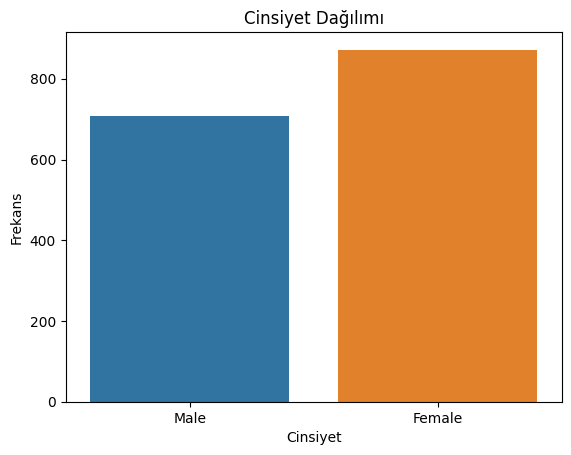

778

In [64]:
# Cinsiyet
data = pd.read_excel('side_effect_data 1.xlsx')

sns.countplot(x='Cinsiyet', data=data)
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Frekans')
plt.show()

data["Cinsiyet"].isna().sum()


In [65]:
# Görüldüğü üzere Cinsiyet değişkenimiz Kadın ve Erkekten oluşmakta ve çok fazla eksik değeri var.
# Bu eksik değerlerin 2357 gözlemden 778'i boş olduğundan dolayı bu gözlemleri kaybedemeyiz.
# Uygun yöntemle doldurulmalıdırlar. Bu eksik verileri Veri Ön İşleme aşamasında dolduracağız.
# Burada uygun yöntem bir tahmin algoritması kullanmaktır çünkü birden fazla kategorik değişkene bakarak gözlemcinin cinsiyetini daha isabetli tahmin edebiliriz.
# LOF

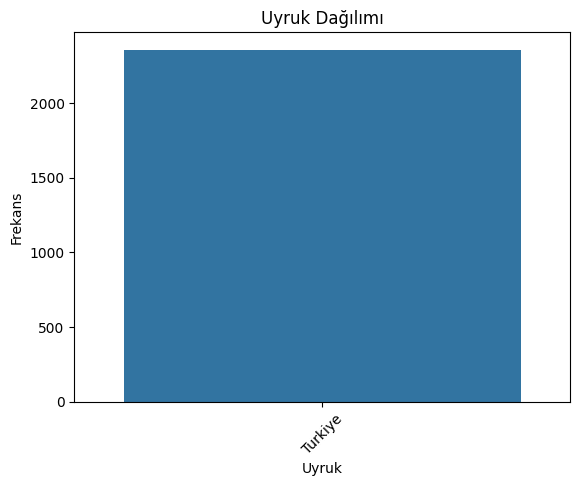

0

In [67]:
# Uyruk Değişkeni

sns.countplot(x='Uyruk', data=data)
plt.title('Uyruk Dağılımı')
plt.xlabel('Uyruk')
plt.ylabel('Frekans')
plt.xticks(rotation=45) 
plt.show()

data["Uyruk"].isna().sum()

In [68]:
# Tüm katılımcılar türktür ve eksik değer yoktur.

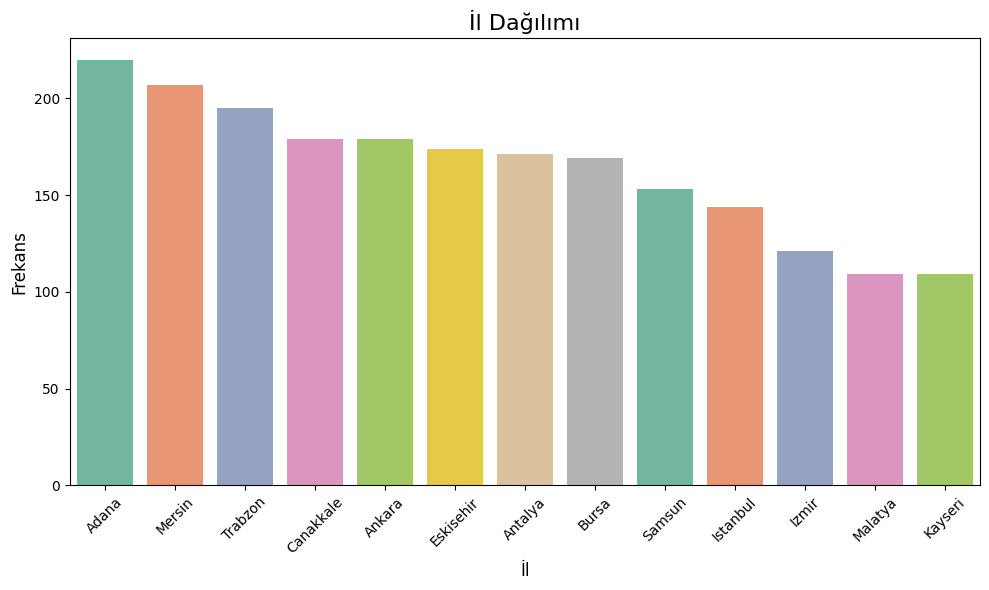

In [71]:
# İl Değişkeni

# İllere göre frekansları say
il_frekans = df['Il'].value_counts()

# Grafik ayarları
plt.figure(figsize=(10, 6))

# Seaborn barplot ile görselleştirme
sns.barplot(x=il_frekans.index, y=il_frekans.values, palette='Set2')

# Grafik başlık ve etiketler
plt.title('İl Dağılımı', fontsize=16)
plt.xlabel('İl', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# X eksenindeki etiketleri daha okunabilir yapmak için açıyı değiştir
plt.xticks(rotation=45)

# Grafiği göster
plt.tight_layout()
plt.show()

In [76]:
df["Il"].isna().sum()

227

In [ ]:
# Yukarıda İl frekans dağılımını görüyoruz.

Veri Seti Genel Bilgi:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 107 to 174
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Cinsiyet                          1579 non-null   object        
 1   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 2   Uyruk                             2357 non-null   object        
 3   Il                                2130 non-null   object        
 4   Ilac_Adi                          2357 non-null   object        
 5   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 6   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 7   Yan_Etki                          2357 non-null   object        
 8   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 9   Alerjilerim                       1873 non-null   object        
 10  Kronik Hastaliklarim    

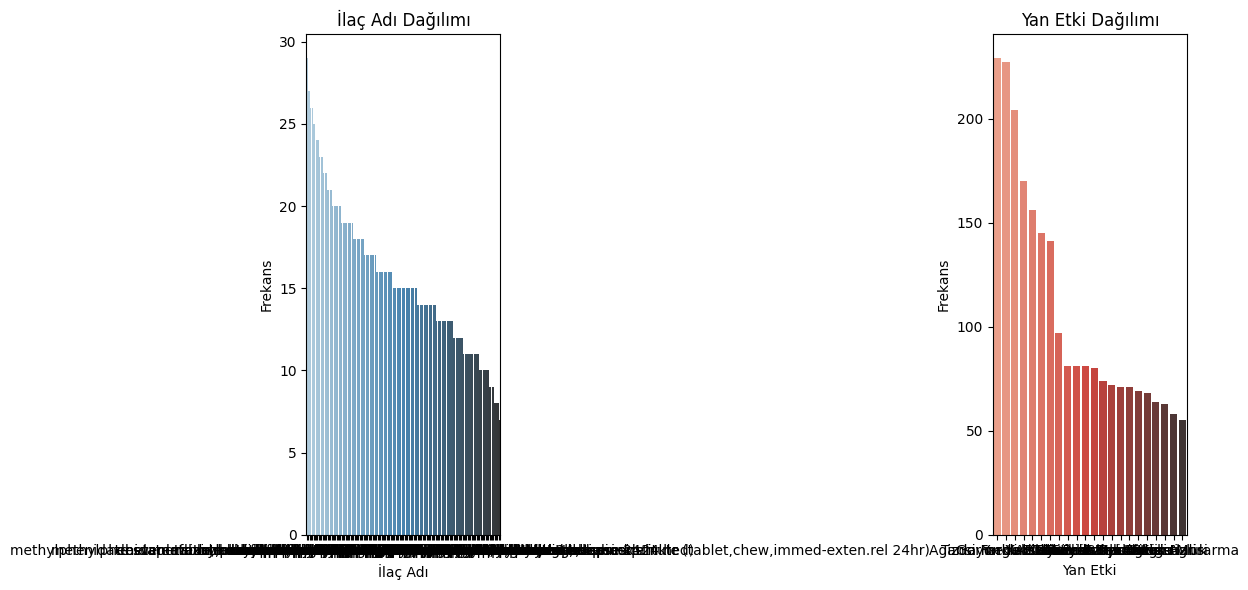

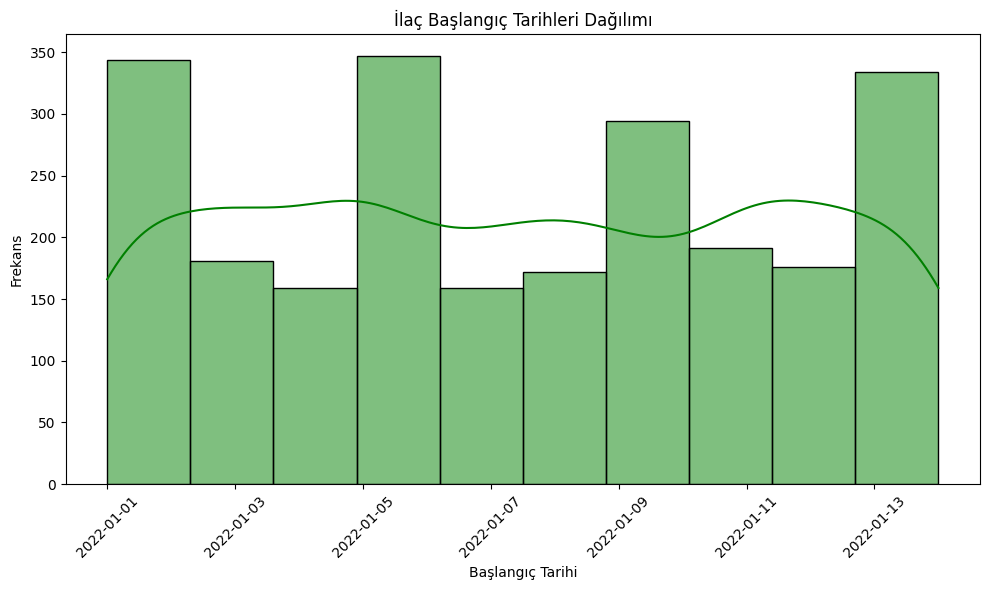

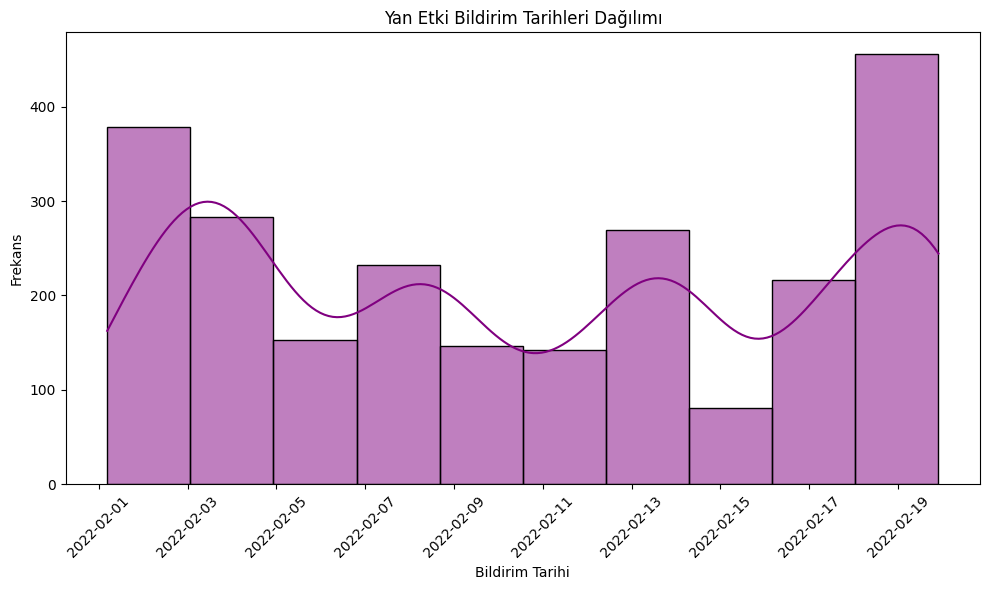

In [79]:
# İlaç adı, İlaç başlangıç tarihi, İlaç bitiş tarihi, Yan etki, Yan etki bildirim tarihi
# Bu değişkenlerde null değer yok ve önemli bilgiler içeriyor
# İlaç başlangıç tarihleri ve yan etki bildirim tarihlerine zaman serisi olarak değerlendirebiliriz

df["Ilac_Adi"].nunique()

# Gözlemlerimiz 151 tane farklı ilaç kullanmıştır, bu sayı bir kategorik bir değişkeni görselleştirmek için çok fazla, görselleştirme anlamsız olacaktır
# Yine de bir bakalım
# 1. Veri yapısının genel incelemesi
print("Veri Seti Genel Bilgi:")
print(df.info())

print("\nVeri Setinin İlk 5 Satırı:")
print(df.head())

# 2. İlaç ve Yan Etki Frekans Analizi
print("\nİlaç Adları Frekansları:")
ilac_frekans = df['Ilac_Adi'].value_counts()
print(ilac_frekans)

print("\nYan Etki Frekansları:")
yan_etki_frekans = df['Yan_Etki'].value_counts()
print(yan_etki_frekans)

# 3. Kategorik veriler için görselleştirme (İlaç Adı ve Yan Etki)
plt.figure(figsize=(12, 6))

# İlaç Adı frekansı grafiği
plt.subplot(1, 2, 1)
sns.barplot(x=ilac_frekans.index, y=ilac_frekans.values, palette='Blues_d')
plt.title('İlaç Adı Dağılımı')
plt.xlabel('İlaç Adı')
plt.ylabel('Frekans')

# Yan Etki frekansı grafiği
plt.subplot(1, 2, 2)
sns.barplot(x=yan_etki_frekans.index, y=yan_etki_frekans.values, palette='Reds_d')
plt.title('Yan Etki Dağılımı')
plt.xlabel('Yan Etki')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

# 4. Zaman Serisi Dağılımı
plt.figure(figsize=(10, 6))

# İlaç Başlangıç Tarihlerinin dağılımı
sns.histplot(df['Ilac_Baslangic_Tarihi'], bins=10, kde=True, color='green')
plt.title('İlaç Başlangıç Tarihleri Dağılımı')
plt.xlabel('Başlangıç Tarihi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Yan Etki Bildirim Tarihlerinin Zaman Serisi Analizi
plt.figure(figsize=(10, 6))

sns.histplot(df['Yan_Etki_Bildirim_Tarihi'], bins=10, kde=True, color='purple')
plt.title('Yan Etki Bildirim Tarihleri Dağılımı')
plt.xlabel('Bildirim Tarihi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
# Bu tablolardan anlamlı bilgiler çıkarabiliriz.
# Mesela İlaç başlangıç tarihleri ve yan etki başlangıç tarihleri arasında bir korelasyon var mı ?
# Bazı ilaçlar arasında korelasyon varsa benzer yan etkileri gösterme ihtimalleri var mı ?
# Sorduğumuz sorulara göre Modelleme aşamasında gerekli tahmin modelleri oluşturulmalıdır
# Araştırma konumuza göre problemimiz istatistiksel yöntemlerle de çözülebilir. öneğin güven aralıkları, hipotez testleri

In [2]:
#İlaç ve yan etkileri arasındaki ilişkileri inceleyelim

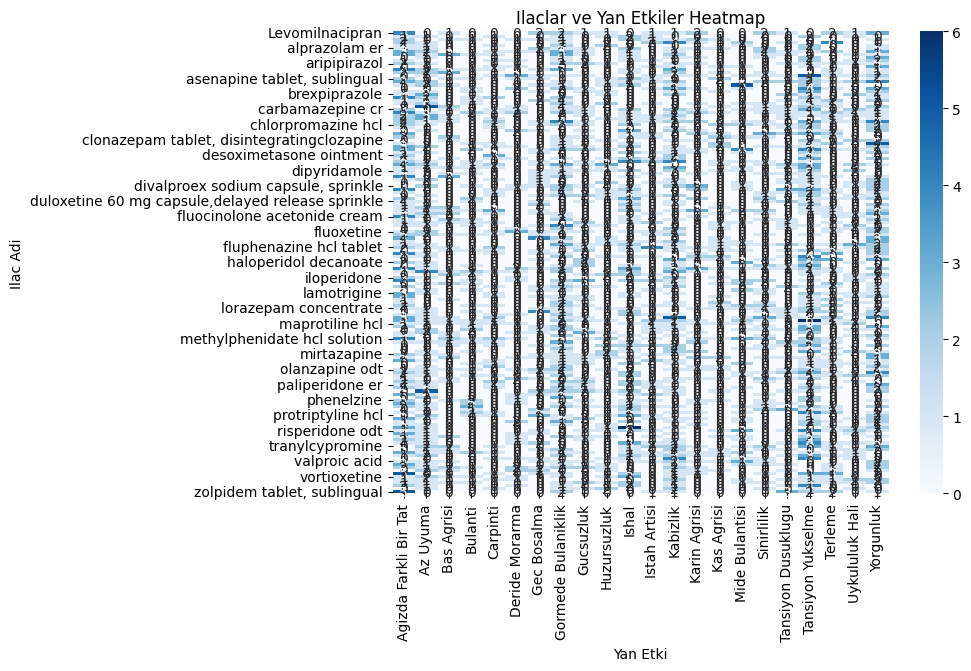

In [82]:
# Çapraz tablo oluşturma
crosstab = pd.crosstab(df['Ilac_Adi'], df['Yan_Etki'])

# Heatmap oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=True)

# Başlık ve eksen adları
plt.title('Ilaclar ve Yan Etkiler Heatmap')
plt.ylabel('Ilac Adi')
plt.xlabel('Yan Etki')

# Grafiği göster
plt.show()

In [3]:
# Diğer değişkenlerin eksik veri sayısını incelediğimde hiçbirinin cinsiyet gibi çok yüksek sayıda 
# eksik değer taşımadığını görüyoruz. Bu yüzden diğer kategorik değişkenleri daha derin incelemeyeceğim.
# Aralarındaki korelasyona bakalım

In [ ]:
categorical_cols = ['Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi',"Yan_Etki","Yan_Etki_Bildirim_Tarihi","Alerjilerim","Kronik Hastaliklarim","Baba Kronik Hastaliklari","Anne Kronik Hastaliklari","Kiz Kardes Kronik Hastaliklari","Erkek Kardes Kronik Hastaliklari","Kan Grubu"]

# Kategorik değişkenler için one-hot encoding (sayısal dönüşüm)
data_encoded = pd.get_dummies(df, columns=categorical_cols)

# Korelasyon matrisi hesaplama
corr_matrix = data_encoded.corr()

# Heatmap çizimi
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Kategorik Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()

# Data Pre-Processing (Veri Ön İşleme)
Eksik değerlerimizi uygun yöntemlerle bu aşamada dolduracağız ya da çıkaracağız. Aykırı değer analizi ile devam edeceğiz.

## Eksik Değer Analizi

In [9]:
print("Veri Seti Genel Bilgi:")
print(df.info())

Veri Seti Genel Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim              

Cinsiyet değişkeni bizim için önemli bir değişken ve oldukça fazla eksik gözlemi var bu yüzden bir tahmin algoritması kullanarak eksik değerleri daha isabetli bir şekilde tahmin ederek bu eksik değerleri dolduralım.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Dogum_Tarihi'nden yaş hesaplama
df['Yas'] = (pd.to_datetime('today') - df['Dogum_Tarihi']).dt.days // 365

# Kullanacağımız özellikler (datetime türünü kullanmıyoruz)
features = ['Yas', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Kilo', 'Boy']

# Kategorik değişkenleri etiketleme (Label Encoding)
le_il = LabelEncoder()
le_ilac = LabelEncoder()
le_yan_etki = LabelEncoder()

df['Il'] = df['Il'].fillna('Bilinmiyor')  # Eksik değerleri bir kategoriye çevirme
df['Ilac_Adi'] = df['Ilac_Adi'].fillna('Bilinmiyor')  # Eksik değerler
df['Yan_Etki'] = df['Yan_Etki'].fillna('Bilinmiyor')  # Eksik değerler

df['Il'] = le_il.fit_transform(df['Il'])
df['Ilac_Adi'] = le_ilac.fit_transform(df['Ilac_Adi'])
df['Yan_Etki'] = le_yan_etki.fit_transform(df['Yan_Etki'])

# Eksik değerleri doldurmak için imputer kullanma
imputer = SimpleImputer(strategy='most_frequent')
df[features] = imputer.fit_transform(df[features])

# Eğitim verisi: 'Cinsiyet' değişkeni dolu olan satırları alıyoruz
train_df = df[df['Cinsiyet'].notna()]

# Tahmin edilecek veri: 'Cinsiyet' değişkeni eksik olan satırları alıyoruz
test_df = df[df['Cinsiyet'].isna()]

# Model için X ve y oluşturma
X_train = train_df[features]
y_train = train_df['Cinsiyet']

# Test veri seti (tahmin için)
X_test = test_df[features]

# Train ve test set oluşturma
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# RandomForest Classifier modelini eğitme
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin yapma
y_val_pred = clf.predict(X_val)

# Doğrulama setindeki doğruluğu hesaplama
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Eksik cinsiyet verilerini tahmin etme
predicted_cinsiyet = clf.predict(X_test)

# Eksik cinsiyet değerlerini doldurmak için veri setini güncelleme
df.loc[df['Cinsiyet'].isna(), 'Cinsiyet'] = predicted_cinsiyet

# Cinsiyet değişkeninin eksik değeri kaldı mı kontrol edelim
missing_cinsiyet_count = df['Cinsiyet'].isna().sum()
print(f"Missing Cinsiyet Values: {missing_cinsiyet_count}")

# Veri setinin güncellenmiş hali
print(df.head())


Validation Accuracy: 100.00%
Missing Cinsiyet Values: 0
   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk    Il  Ilac_Adi  \
0           107     Male   1960-03-01  Turkiye   4.0     138.0   
1           140     Male   1939-10-12  Turkiye  12.0      68.0   
2             2   Female   1976-12-17  Turkiye   4.0     146.0   
3            83     Male   1977-06-17  Turkiye   0.0     140.0   
4             7   Female   1976-09-03  Turkiye   7.0      26.0   

  Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  Yan_Etki Yan_Etki_Bildirim_Tarihi  \
0            2022-01-09        2022-03-04      12.0      2022-02-19 18:28:43   
1            2022-01-09        2022-03-08      21.0      2022-02-03 20:48:17   
2            2022-01-11        2022-03-12       4.0      2022-02-04 05:29:20   
3            2022-01-04        2022-03-12      16.0      2022-02-08 01:01:21   
4            2022-01-13        2022-03-06       0.0      2022-02-12 05:33:06   

  Alerjilerim             Kronik Hastaliklarim  Baba Kronik Hastal

Erkek ve Kadınlar boy ve kiloları birbirinden farklı olacağından buradaki eksik değerleri katılımcının kadın veya erkek olmasına göre o ortalama ile doldurma kararı aldım.

In [14]:
import pandas as pd

# Kadın ve erkeklerin ortalama boy ve kilo değerlerini hesaplama
ortalama_kadin_boy = df[df['Cinsiyet'] == 'Kadın']['Boy'].mean()
ortalama_kadin_kilo = df[df['Cinsiyet'] == 'Kadın']['Kilo'].mean()

ortalama_erkek_boy = df[df['Cinsiyet'] == 'Erkek']['Boy'].mean()
ortalama_erkek_kilo = df[df['Cinsiyet'] == 'Erkek']['Kilo'].mean()

# Eksik boy ve kilo değerlerini doldurma
df.loc[(df['Cinsiyet'] == 'Kadın') & (df['Boy'].isna()), 'Boy'] = ortalama_kadin_boy
df.loc[(df['Cinsiyet'] == 'Kadın') & (df['Kilo'].isna()), 'Kilo'] = ortalama_kadin_kilo

df.loc[(df['Cinsiyet'] == 'Erkek') & (df['Boy'].isna()), 'Boy'] = ortalama_erkek_boy
df.loc[(df['Cinsiyet'] == 'Erkek') & (df['Kilo'].isna()), 'Kilo'] = ortalama_erkek_kilo

# Güncellenmiş veri setindeki eksik değerleri kontrol edelim
eksik_boy = df['Boy'].isna().sum()
eksik_kilo = df['Kilo'].isna().sum()

print(f"Eksik Boy Değerleri: {eksik_boy}")
print(f"Eksik Kilo Değerleri: {eksik_kilo}")

# Veri setinin genel bilgisi
print(df.info())


Eksik Boy Değerleri: 0
Eksik Kilo Değerleri: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          2357 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2357 non-null   float64       
 5   Ilac_Adi                          2357 non-null   float64       
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   float64       
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  A

## **Alerji, Kronik Hastalık gibi değişkenlerin hatalı tahmin edilerek doldurulması büyük problemler yaratabileceği için buradaki eksik değerler ile ilgili kararı araştırmacının amacına yönelik ele alınması gerekir. Eğer araştırmacı buradaki bilgilerden, kullanılan ilaca verilen yan etki, x kronik hastalığı olanların ve belirli yaş ve kiloda olanların verdiği yan etki gibi araştırma sorularına yönelik işlem yapılmalı ve veri seti ona göre hazırlanmalıdır.**

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Eksik kategorik değişkenler
categorical_features = ['Uyruk', 'Il', 'Kan Grubu']

# Nicel değişkenler (Boy ve Kilo daha önce doldurulmuş olduğundan, sadece standardizasyon yapılacak)
numeric_features = ['Kilo', 'Boy']

# Kategorik verilerde eksik değerleri en yaygın değer ile doldurma (Cinsiyet hariç)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Boy ve Kilo gibi sayısal değişkenlerin standardize edilmesi (Eksik değerleri cinsiyet bazlı doldurduğumuz için sadece ölçekleme yapılacak)
scaler = StandardScaler()

# Kategorik değişkenlerin OneHotEncoding yapılması
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Zaman verilerinden anlamlı bileşenler elde etme (Doğum_Tarihi, İlaç_Başlangıç_Tarihi vb.)
df['Dogum_Yili'] = df['Dogum_Tarihi'].dt.year
df['Ilac_Baslangic_Yili'] = df['Ilac_Baslangic_Tarihi'].dt.year
df['Ilac_Bitis_Yili'] = df['Ilac_Bitis_Tarihi'].dt.year

# Sadece doldurulmamış eksik veri içeren sütunlara yönelik Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_imputer', categorical_imputer, categorical_features),  # Kategorik eksik doldurma
        ('scaler', scaler, numeric_features),  # Boy ve Kilo için ölçekleme
        ('encoder', one_hot_encoder, categorical_features)  # Kategorik veriler için OneHotEncoder
    ], remainder='passthrough')  # Diğer sütunları olduğu gibi bırak

# Pipeline ile veri setini işleme
df_processed = preprocessor.fit_transform(df)

# İşlenmiş veri setine zaman sütunlarını geri ekleme
df_processed = pd.DataFrame(df_processed, columns=preprocessor.get_feature_names_out())
df_processed['Dogum_Yili'] = df['Dogum_Yili']
df_processed['Ilac_Baslangic_Yili'] = df['Ilac_Baslangic_Yili']
df_processed['Ilac_Bitis_Yili'] = df['Ilac_Bitis_Yili']

# İşlenmiş veri setini inceleyelim
print(df_processed.head())

# Eksik veri kalıp kalmadığını kontrol etme
print(df_processed.isna().sum())


  cat_imputer__Uyruk cat_imputer__Il cat_imputer__Kan Grubu scaler__Kilo  \
0            Turkiye             4.0                  B RH-     0.957343   
1            Turkiye            12.0                 AB RH-    -0.165171   
2            Turkiye             4.0                  B RH-     0.447109   
3            Turkiye             0.0                 AB RH-      1.21246   
4            Turkiye             7.0                 AB RH-     0.753249   

  scaler__Boy encoder__Il_1.0 encoder__Il_2.0 encoder__Il_3.0 encoder__Il_4.0  \
0    0.993046             0.0             0.0             0.0             1.0   
1    0.374475             0.0             0.0             0.0             0.0   
2   -1.048237             0.0             0.0             0.0             1.0   
3   -0.615238             0.0             0.0             0.0             0.0   
4   -0.182238             0.0             0.0             0.0             0.0   

  encoder__Il_5.0  ... remainder__Anne Kronik Hastalikla

## Aykırı Değerler

In [19]:
import numpy as np

# Aykırı değer tespiti için kullanılacak nicel değişkenler (örnek olarak: Kilo ve Boy)
numeric_columns = ['Kilo', 'Boy']

# Aykırı değerleri IQR metodu ile tespit etme ve temizleme
def remove_outliers_iqr(df, columns):
    for column in columns:
        # Q1 ve Q3'ü hesaplama
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Alt ve üst sınırları belirleme
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Aykırı değerleri tespit etme
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"{column} için tespit edilen aykırı değer sayısı: {len(outliers)}")
        
        # Aykırı değerleri veri setinden çıkarma
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Aykırı değerlerden arındırılmış veri seti
df_cleaned = remove_outliers_iqr(df, numeric_columns)

# Aykırı değerlerden arındırılmış veri setini inceleme
print(df_cleaned.describe())

# Temizlenmiş veri setinin boyutlarını kontrol etme
print(f"Veri seti boyutu (önce): {df.shape}")
print(f"Veri seti boyutu (sonra): {df_cleaned.shape}")


Kilo için tespit edilen aykırı değer sayısı: 0
Boy için tespit edilen aykırı değer sayısı: 0
       Kullanici_id           Il     Ilac_Adi     Yan_Etki         Kilo  \
count   2357.000000  2357.000000  2357.000000  2357.000000  2357.000000   
mean      97.216801     6.458210    74.059822    10.635554    84.237166   
std       57.017200     4.314913    43.941496     6.921950    19.603026   
min        1.000000     0.000000     0.000000     0.000000    50.000000   
25%       47.000000     3.000000    35.000000     5.000000    67.000000   
50%       97.000000     6.000000    74.000000    11.000000    87.000000   
75%      146.000000    10.000000   112.000000    18.000000   105.000000   
max      196.000000    13.000000   150.000000    21.000000   110.000000   

               Boy          Yas   Dogum_Yili  Ilac_Baslangic_Yili  \
count  2357.000000  2357.000000  2357.000000               2357.0   
mean    174.946118    49.364871  1974.409419               2022.0   
std      16.169730    20

## Korelasyon Analizi <br>
Tüm değişlenlerin arasında ilişkileri incelemek istiyorum. Fakat bunun için bazı verileri yeni verilere dönüştürmem lazım. Doğum tarihini güncel yaş'a, ilaç başlama ve bitiş tarihi verilerinden de tedavi süresi hesaplayarak bunlar üzerinden daha anlamlı bilgiler elde edebileceğimi düşünüyorum.

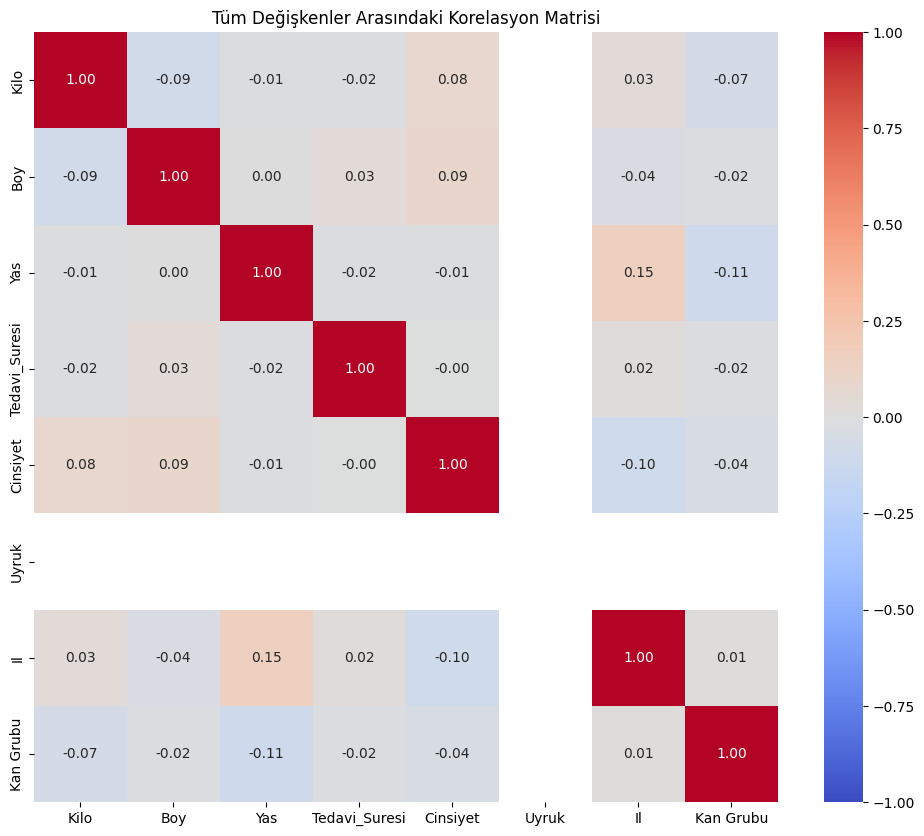

                   Kilo       Boy       Yas  Tedavi_Suresi  Cinsiyet  Uyruk  \
Kilo           1.000000 -0.086638 -0.011754      -0.018813  0.082600    NaN   
Boy           -0.086638  1.000000  0.004978       0.031659  0.089181    NaN   
Yas           -0.011754  0.004978  1.000000      -0.019449 -0.009929    NaN   
Tedavi_Suresi -0.018813  0.031659 -0.019449       1.000000 -0.001745    NaN   
Cinsiyet       0.082600  0.089181 -0.009929      -0.001745  1.000000    NaN   
Uyruk               NaN       NaN       NaN            NaN       NaN    NaN   
Il             0.032686 -0.035866  0.151420       0.017952 -0.095266    NaN   
Kan Grubu     -0.065326 -0.020936 -0.105662      -0.021290 -0.039577    NaN   

                     Il  Kan Grubu  
Kilo           0.032686  -0.065326  
Boy           -0.035866  -0.020936  
Yas            0.151420  -0.105662  
Tedavi_Suresi  0.017952  -0.021290  
Cinsiyet      -0.095266  -0.039577  
Uyruk               NaN        NaN  
Il             1.000000   0.0

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Güncel tarihi al
current_date = pd.to_datetime('today')

# Yaş hesaplama (güncel tarih - doğum tarihi)
df['Yas'] = (current_date - df['Dogum_Tarihi']).dt.days // 365  # Günleri yıla çevirme

# Tedavi süresi hesaplama (Başlangıç ve bitiş tarihleri arasındaki fark)
df['Tedavi_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

# Sayısal değişkenler (Yaş ve tedavi süresi dahil)
numeric_columns = ['Kilo', 'Boy', 'Yas', 'Tedavi_Suresi']

# Kategorik değişkenler
categorical_columns = ['Cinsiyet', 'Uyruk', 'Il', 'Kan Grubu']

# Kategorik değişkenleri sayısala çevirme (Label Encoding)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Kategorik verileri sayısala çevirme
    label_encoders[col] = le

# Korelasyon matrisi oluşturma (Sayısal ve dönüştürülmüş kategorik veriler)
correlation_matrix = df[numeric_columns + categorical_columns].corr()

# Korelasyon matrisini görselleştirme (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Tüm Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()

# Korelasyon matrisini yazdırma
print(correlation_matrix)


Yukarıki korelasyon matrislerine baktığımızda hiçbir değişken arasında güçlü pozitif ya da negatif ilişki olmadığını görüyoruz bu da tam bizim istediğimiz şey. Kilo ve boy'un cinsiyetle ilişkisi olduğunu görüyoruz ama bu zaten beklediğimiz bir şey, bu yüzden eksik veri analizinde cinsiyetleri ona göre düzenledik, yapmış olduğumuz düzenlemede bu korelasyonu daha da güçlendirdi. Ama zaten bunlarda endişe edeceğimiz güçlü ilişkiler değil.